<a href="https://colab.research.google.com/github/asyraffatha/Task-MachineLearning/blob/main/Week%201/Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#fungsi untuk menggunggah dataset
def upload_file():
    from google.colab import files
    uploaded = files.upload()

    # Reading the uploaded file into a dataframe
    dataset = pd.read_csv(io.BytesIO(uploaded['50_Startups.csv']))
    return dataset

In [ ]:
#memasukkan library yang diperlukan
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [ ]:
#load dataset
dataset = upload_file()

Saving 50_Startups.csv to 50_Startups.csv


In [ ]:
#menampilkan beberapa baris pertama himpunan data
print(dataset.head())

   R&D Spend  Administration  Marketing Spend       State     Profit
0  165349.20       136897.80        471784.10    New York  192261.83
1  162597.70       151377.59        443898.53  California  191792.06
2  153441.51       101145.55        407934.54     Florida  191050.39
3  144372.41       118671.85        383199.62    New York  182901.99
4  142107.34        91391.77        366168.42     Florida  166187.94


In [ ]:
#menangani data kategoris menggunakan OneHotEncoding (jika diperlukan)
#asumsikan "State" adalah kolom kategoris dalam himpunan data
X = dataset.iloc[:, :-1].values  # Independent variables
y = dataset.iloc[:, -1].values   # Dependent variable (Profit)

In [ ]:
#menangani data kategoris (misalnya, kolom State)
#oneHotEncode untuk data kategoris
encoder = OneHotEncoder(drop='first')
X = np.array(encoder.fit_transform(X[:, [3]]).toarray())  # Encoding "State" (column 3)
X = np.hstack((X, dataset.iloc[:, :3].values))  # Concatenating encoded and numerical data

In [ ]:
#memisahkan himpunan data menjadi Training Set dan Set Pengujian
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
#menyesuaikan Multiple Linear Regression kedalam Training Set
regressor = LinearRegression()
regressor.fit(X_train, y_train)


LinearRegression()

In [ ]:
#memprediksi hasil
y_pred = regressor.predict(X_test)

In [ ]:
#evaluasi model
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared Score:', r2_score(y_test, y_pred))


Mean Squared Error: 83502864.03250548
R-squared Score: 0.9347068473282987


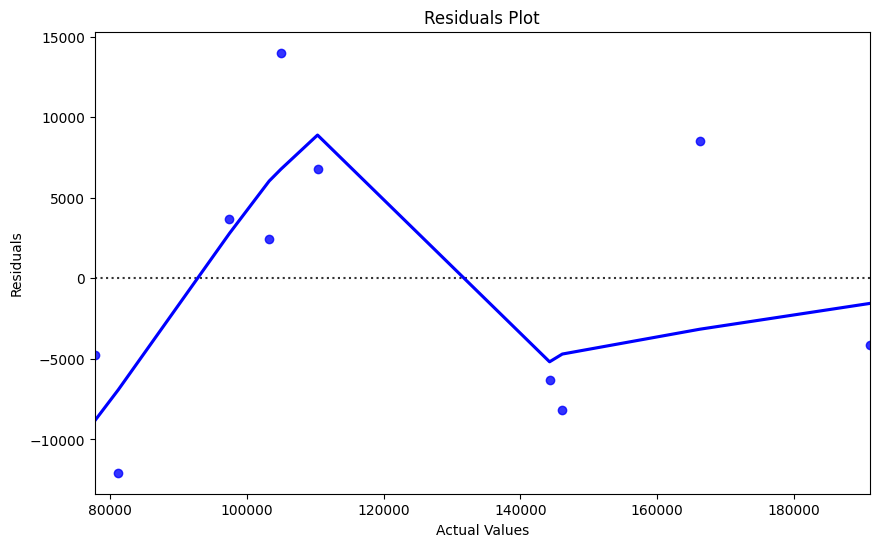

In [ ]:
#memvisualisasikan kesalahan
plt.figure(figsize=(10,6))

#pastikan y_test dan y_pred adalah array 1D
sns.residplot(x=y_test, y=y_pred, color="blue", lowess=True)
plt.title('Residuals Plot')
plt.xlabel('Actual Values')
plt.ylabel('Residuals')

plt.show()
